## Processing Input Data

### Importing Data

The particulate matter data show some differences each other, on one hand the PM2.5 present fewer input variables as well some different type of variables if we compare these data with PM10.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [2]:
#Reading data and naming Columns
PM25data=pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")
PM10data=loadmat('data_Polish.mat')
PM10data=pd.DataFrame.from_dict(PM10data['x'])
PM10data.columns = ['PM_10','SO2','NO_2','OZON','WIND_SPEED', 'WIND_DIR', 'TEMP', 'PROM_SLON', 'WILGOT', 'WIND_X', 'WIND_Y']

### NAN Values in datasets 

There are some NaN numbers in the PM2.5 data, it can be seen in the following two cells. On possible workarround may be to interpolate the missing values with the known ones and ensure all dataset will have defined values.

In [3]:
PM25data.isna().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [4]:
PM10data.isna().sum()

PM_10         0
SO2           0
NO_2          0
OZON          0
WIND_SPEED    0
WIND_DIR      0
TEMP          0
PROM_SLON     0
WILGOT        0
WIND_X        0
WIND_Y        0
dtype: int64

The interpolation is then carried out, nevertheless, the first 24 data points are still missing, thus they are removed completly.

In [5]:
#Interpolation and removing NAN Values from PM2.5 data, new data index is set. 
PM25_interpolate=PM25data['pm2.5'].fillna(method='ffill')
PM25data_clean=PM25data
PM25data_clean['pm2.5']=PM25_interpolate
PM25data_clean=PM25data_clean[24:]
i_PM10 = pd.date_range('2006-01-01', periods=len(PM10data), freq='H')
PM10data.index=i_PM10
PM25data_clean=PM25data_clean.set_index(['year', 'month','day','hour'])
PM25data=PM25data_clean
PM25data.drop(['No'], axis=1, inplace=True)
PM25data['new_idx']=pd.to_datetime(PM25data.index.to_frame())
PM25data.set_index('new_idx', inplace=True)

In [6]:
PM10data

,PM_10,SO2,NO_2,OZON,WIND_SPEED,WIND_DIR,TEMP,PROM_SLON,WILGOT,WIND_X,WIND_Y
2006-01-01 00:00:00,9.1,19.0,18.5,28.1,1.68,314.0,-3.4,0.0,95.0,-0.266436,1.658738
2006-01-01 01:00:00,9.1,30.3,19.9,27.1,1.58,297.0,-3.5,0.0,94.0,1.568733,-0.188352
2006-01-01 02:00:00,9.1,9.3,8.6,39.6,1.40,263.0,-3.7,0.0,93.0,-1.091226,0.877055
2006-01-01 03:00:00,9.1,19.1,12.5,33.5,1.36,273.0,-4.0,0.0,94.0,0.425952,-1.291575
2006-01-01 04:00:00,9.1,22.4,16.1,32.2,1.32,252.0,-4.2,0.0,94.0,0.822376,1.032520
...,...,...,...,...,...,...,...,...,...,...,...
2010-03-15 10:00:00,22.7,2.5,9.5,49.9,1.70,214.0,12.2,2.0,99.0,0.617439,1.583909
2010-03-15 11:00:00,22.8,3.8,13.6,38.8,1.46,171.0,11.9,24.0,99.0,1.425823,0.314054
2010-03-15 12:00:00,26.8,4.9,17.8,35.8,1.35,281.0,12.0,60.0,99.0,-1.329954,-0.231778
2010-03-15 13:00:00,23.4,3.6,20.2,39.8,1.43,232.0,12.6,168.0,93.0,-0.657624,1.269815


In [7]:
PM25data

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
new_idx,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


### Creating Daily Regressors

The daily regressors are now generated calculating the mean of each variable every 24 hours, the vales from non numeric variables are removed from the newly created dataframe. The boxplots show higher variability in the PM2.5 data, in both data however, several outliers points appear.

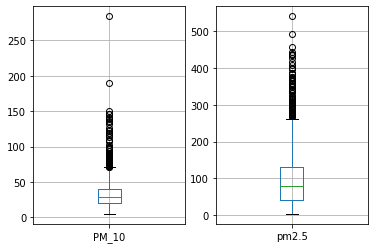

In [8]:
PM10_daily=PM10data.resample('d').mean()
PM25_daily=PM25data.resample('d').mean()
fig, axs = plt.subplots(1,2)
boxplot1 = PM10_daily.boxplot(column=['PM_10'], ax=axs[0])
boxplot2 = PM25_daily.boxplot(column=['pm2.5'], ax=axs[1])

In [17]:
#Standardization of data
X_PM10=PM10_daily.values
X_PM25=PM25_daily.values
scaler_X_PM10 = preprocessing.StandardScaler().fit(X_PM10)
scaler_X_PM25 = preprocessing.StandardScaler().fit(X_PM25)

#Other type of normalization=>

#MinMaxScaler
#minmax_scale
#MaxAbsScaler
#StandardScaler
#RobustScaler
#Normalizer
#QuantileTransformer
#PowerTransformer

X_PM10_scaled=scaler_X_PM10.transform(X_PM10)
X_PM25_scaled=scaler_X_PM25.transform(X_PM25)

In [61]:
X_PM10_scaled[:][1:np.size(X_PM10_scaled,1)]

array([[-0.90816039,  0.98243078, -0.36335633, -0.32615023,  0.92411938,
         1.73190552, -2.03625402, -1.11475555,  0.36898616,  0.46936656,
        -2.08398497],
       [ 1.20758202,  1.9987331 ,  1.12301596, -0.93874448, -1.34842715,
         0.96279176, -2.32718861, -1.0145761 ,  0.59927906,  0.25061058,
        -0.19237736],
       [ 0.35555275,  0.87579382,  1.06385323, -0.87626135, -0.28335835,
         2.10944494, -2.0496744 , -1.13835338,  0.97587569,  0.23135213,
        -1.23606652],
       [ 1.00434568,  2.05920406,  1.5963178 , -0.9559876 , -0.41227589,
         0.6119187 , -1.92218082, -1.16684887,  1.39040292,  0.47671896,
         0.30909961],
       [ 1.30418943,  2.39992218,  0.37289098, -0.67045638,  0.0127023 ,
        -1.55928384, -2.17381288, -1.05197643,  1.28744845, -0.94055462,
        -1.05839687],
       [-0.41149407,  3.50010357, -0.31697567, -0.11311428,  0.8304293 ,
        -1.5206878 , -2.22701508, -1.17174653,  1.08966748,  0.11321827,
        -0.535

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_PM10_scaled)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

NameError: name 'df' is not defined